In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd

In [3]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
frame=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [5]:
print(frame)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [6]:
np.c_

In [7]:
frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
frame.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


C:\Users\avish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\avish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


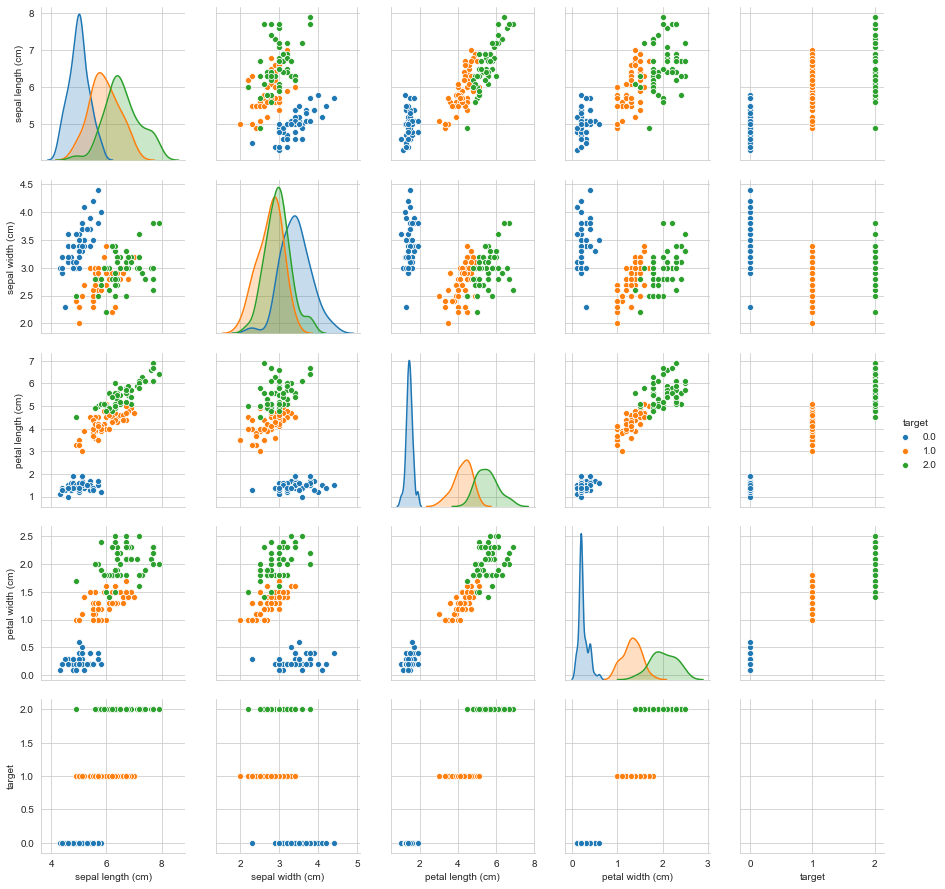

In [9]:
sns.set_style('whitegrid')
sns.pairplot(frame,hue='target')

In [10]:
x=iris.data[0:150,:]
print(x.shape)
y=iris.target[0:150]
print(y.shape)

(150, 4)
(150,)


In [11]:
setosa_in=rd.randrange(0,49)
test_setosa=[iris.data[setosa_in,:]]
x=np.delete(x,setosa_in,0)
y=np.delete(y,setosa_in,0)
test_setosa,iris.target_names[iris.target[setosa_in]],x.shape,y.shape

([array([4.5, 2.3, 1.3, 0.3])], 'setosa', (149, 4), (149,))

In [12]:
x=iris.data[0:150,:]
y=iris.target[0:150]
versicolour_in=rd.randrange(50,99)
test_versicolour=[iris.data[versicolour_in,:]]
x=np.delete(x,versicolour_in,0)
y=np.delete(y,versicolour_in,0)
test_versicolour,iris.target_names[iris.target[versicolour_in]],x.shape,y.shape

([array([6. , 2.7, 5.1, 1.6])], 'versicolor', (149, 4), (149,))

In [13]:
x=iris.data[0:150,:]
y=iris.target[0:150]
virginica_in=rd.randrange(100,149)
test_virginica=[iris.data[virginica_in,:]]
x=np.delete(x,virginica_in,0)
y=np.delete(y,virginica_in,0)
test_virginica,iris.target_names[iris.target[virginica_in]],x.shape,y.shape

([array([7.2, 3.2, 6. , 1.8])], 'virginica', (149, 4), (149,))

In [14]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
tree_Model=tree.DecisionTreeClassifier()
tree_Model.fit(x,y)
pred_setosa=tree_Model.predict(test_setosa)
print("Decision Tree Predicts {} for Setosa".format(iris.target_names[pred_setosa]))

Decision Tree Predicts ['setosa'] for Setosa


In [16]:
pred_versicolour=tree_Model.predict(test_versicolour)
print("Decision Tree Predicts {} for Versicolour".format(iris.target_names[pred_versicolour]))

Decision Tree Predicts ['versicolor'] for Versicolour


In [17]:
pred_virginica=tree_Model.predict(test_virginica)
print("Decision Tree Predicts {} for Virginica".format(iris.target_names[pred_virginica]))

Decision Tree Predicts ['virginica'] for Virginica


In [18]:
Y=frame['target']
X=frame[['petal length (cm)' ,'petal width (cm)' ]]
from sklearn import tree,metrics,model_selection,preprocessing
from sklearn.tree import DecisionTreeClassifier
train_x,test_x,train_y,test_y=model_selection.train_test_split(X,Y,train_size=0.3,random_state=0)

In [31]:
decisiontree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
decisiontree.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
pred_y=decisiontree.predict(test_x)
misclassified=(test_y!=pred_y).sum()
print('Misclassified {}'.format(misclassified))
accuracy=metrics.accuracy_score(test_y,pred_y)
print('Accuracy {:.2f}'.format(accuracy))

Misclassified 9
Accuracy 0.91


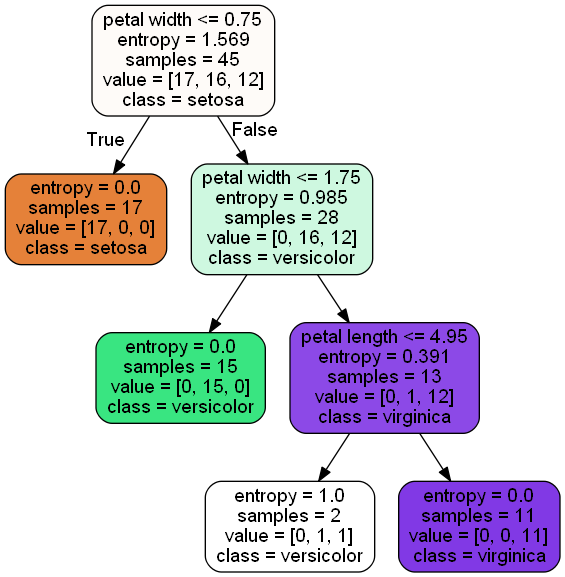

In [33]:
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus
d_data=tree.export_graphviz(decisiontree,out_file=None,filled=True,rounded=True,feature_names=['petal length','petal width'],class_names=['setosa','versicolor','virginica'])
graph=pydotplus.graph_from_dot_data(d_data)
display(Image(graph.create_png()))